# Working with survailance videos, captioning frames and detecting indoor/outdoor

In [29]:
# This notebook is a tutorial of fastdup beta advanced capabilities. Please sign up for a free version at info@visual-layer.com to unlock those and many other functionalities.


In [13]:
from IPython.display import Image

## Download the fight detection survailance camera dataset

In [ ]:
!git clone https://github.com/seymanurakti/fight-detection-surv-dataset.git

## Install fastdup

In [1]:
%pip install fastdup
import fastdup

## Extract videos into frames

In [4]:
!mkdir -p frames
fastdup.extract_video_frames('fight-detection-surv-dataset/fight/', 'frames/fight')
fastdup.extract_video_frames('fight-detection-surv-dataset/noFight/', 'frames/no-fight')


FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-05-07 08:41:26 [INFO] Going to loop over dir /mnt/data/fight-detection-surv-dataset/fight
2023-05-07 08:41:26 [INFO] Found total 150 videos to run on, 150 train, 0 test, name list 150, counter 150 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-05-07 08:41:34 [INFO] Going to loop over dir /mnt/data/fight-detection-surv-dataset/noFight
2023-05-07 08:41:34 [INFO] Found total 150 videos to run on, 150 train, 0 test, name list 150, counter 150 


0

## Quick preview of video frames

In [8]:
fight_files=!find frames/fight/ -name '*.jpg'
no_fight_files=!find frames/no-fight/ -name '*.jpg'

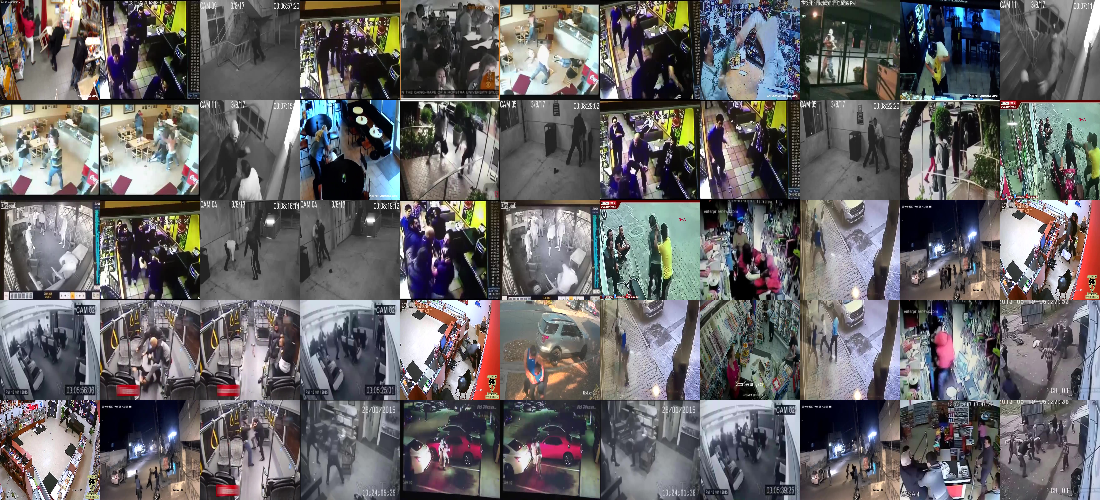

In [9]:
ret = fastdup.generate_sprite_image(fight_files, 55, ".")[0]
from IPython.display import Image
Image(filename=ret)
                              

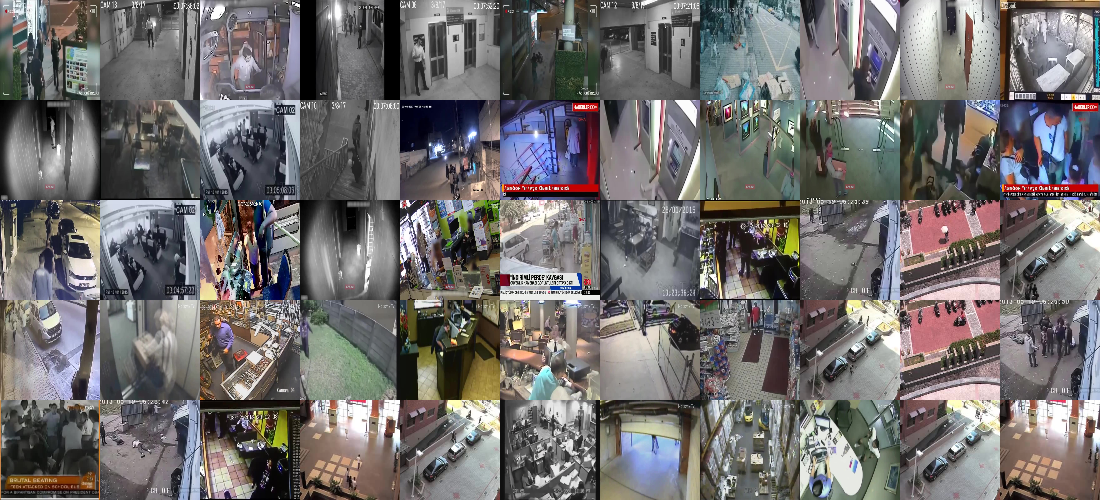

In [12]:
ret = fastdup.generate_sprite_image(no_fight_files, 55, ".")[0]
Image(filename=ret)

## Build fastdup model

In [3]:
# Cluster similar frames together
fd = fastdup.create(input_dir='frames', work_dir='out_frames')
fd.run(overwrite=True, model_path='dinov2s')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 79.84it/s]

Finished OK. Components are stored as image files out_frames/galleries/components_[index].jpg
Stored components visual view in  out_frames/galleries/components.html
Execution time in seconds 0.2



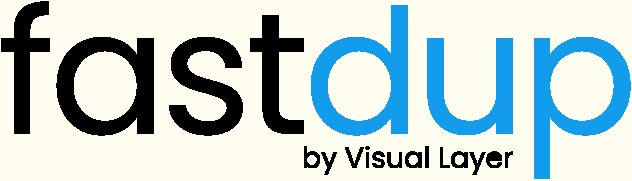
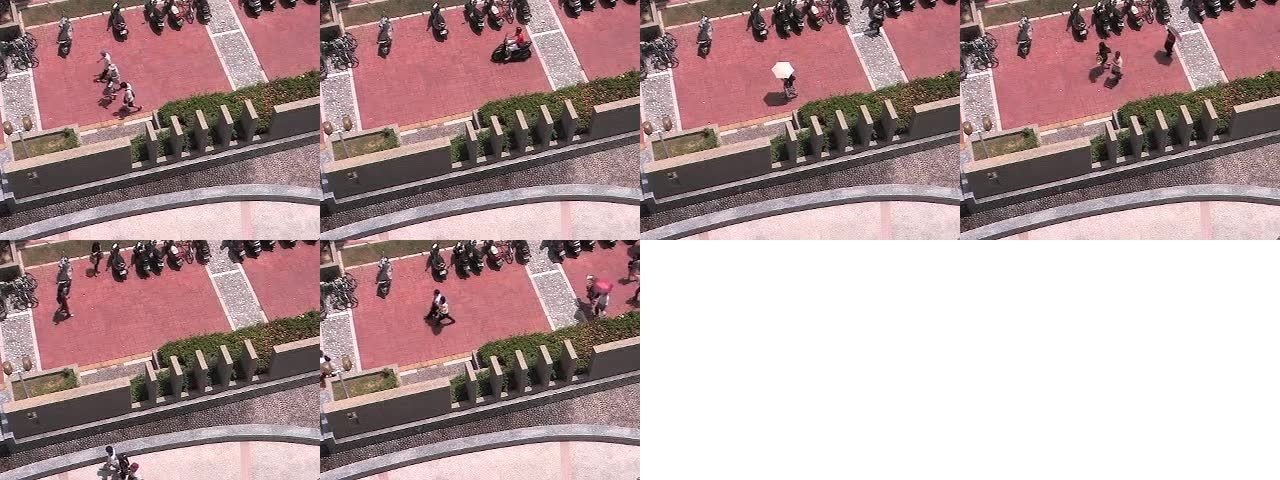
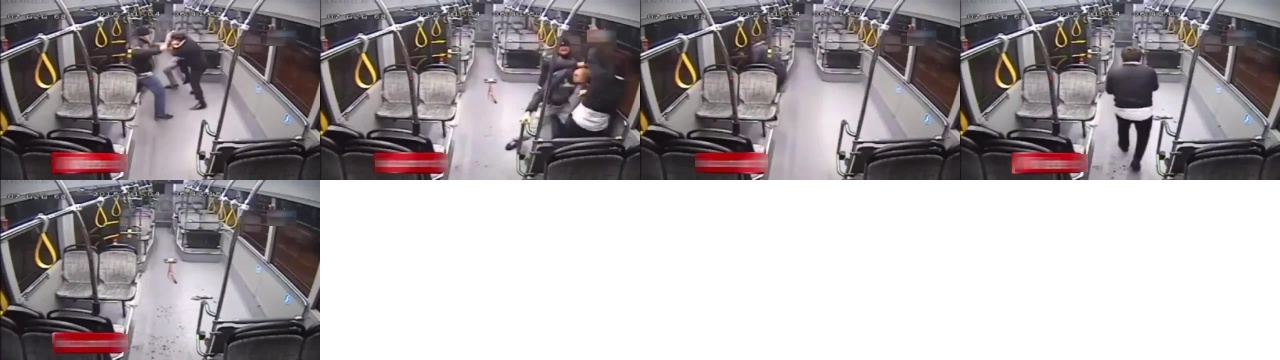
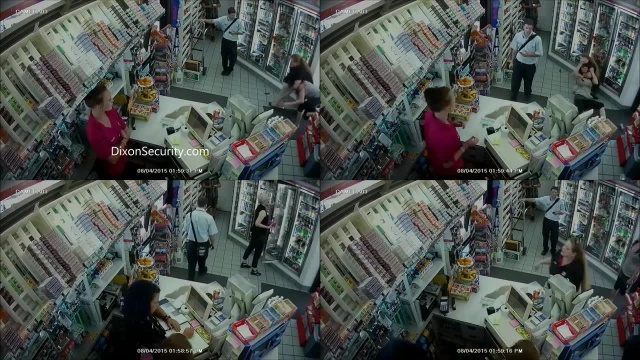
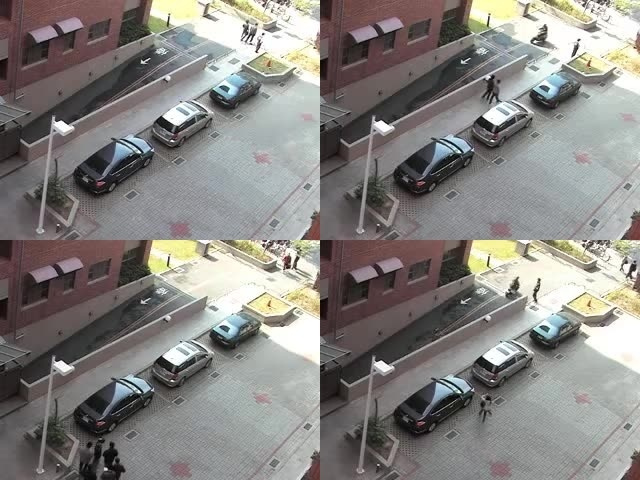
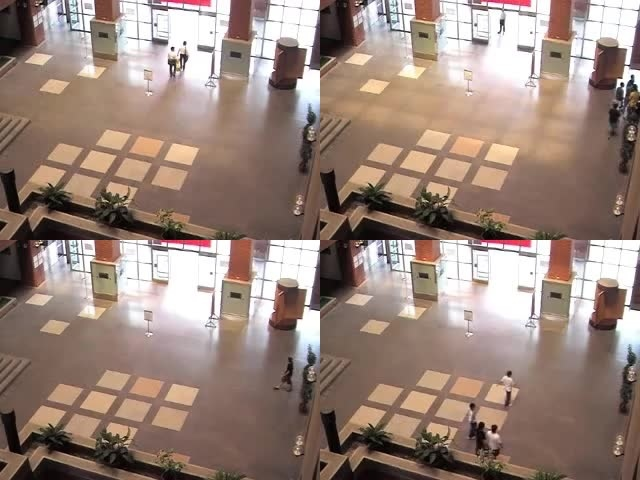
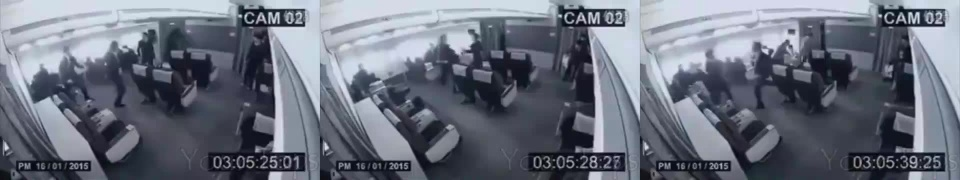
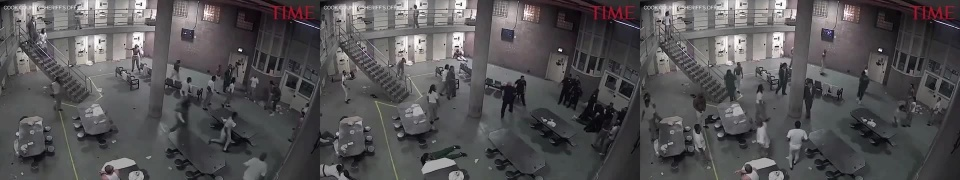
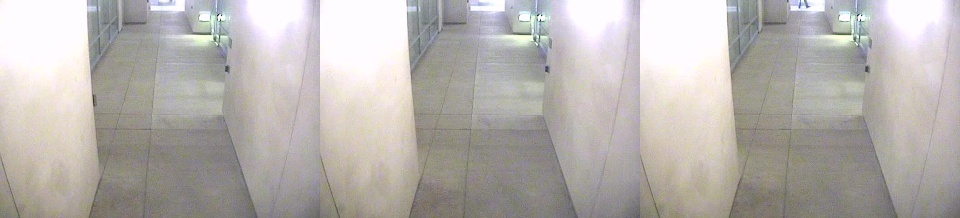
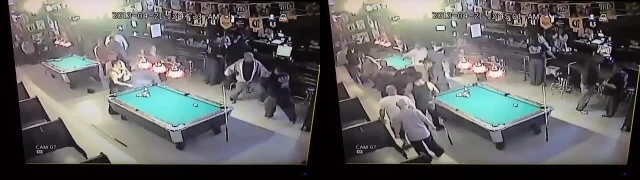
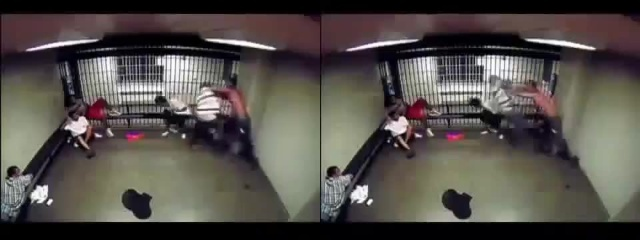

In [10]:
fd.vis.component_gallery(num_images=10)

## Look at video outliers, and caption them automatically

  0%|                                                                                                                          | 0/10 [00:00<?, ?it/s]/Users/dannybickson/homebrew/lib/python3.8/site-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31823.25it/s]

Stored outliers visual view in  out_frames/galleries/outliers.html



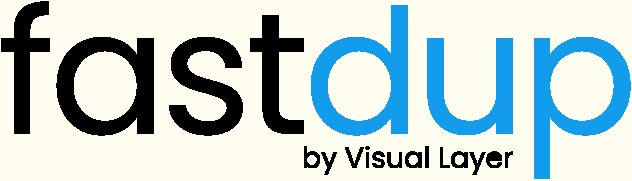
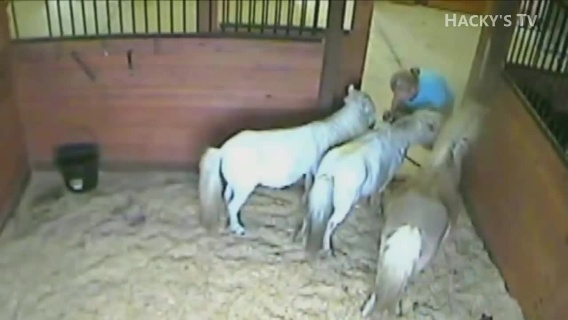
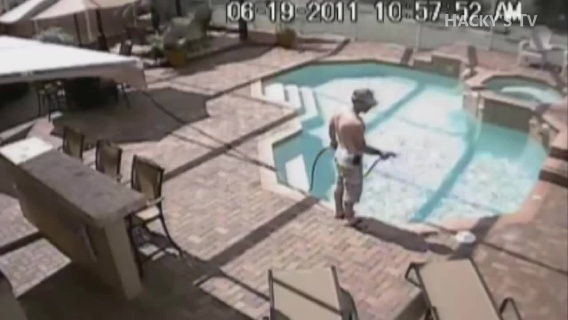
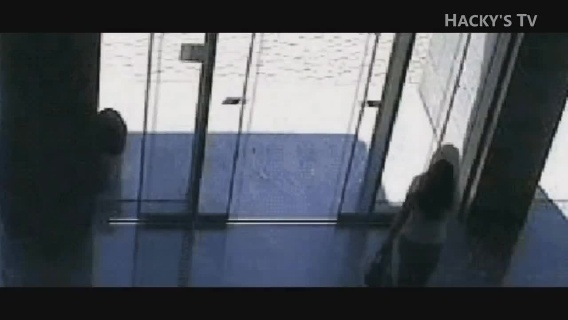
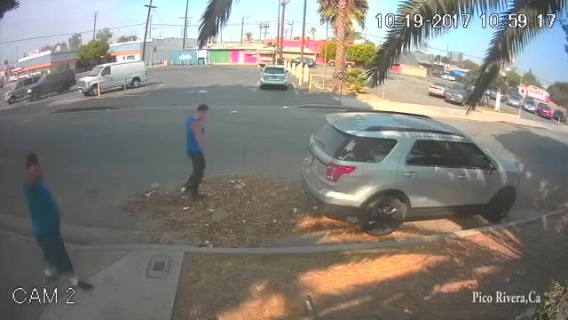
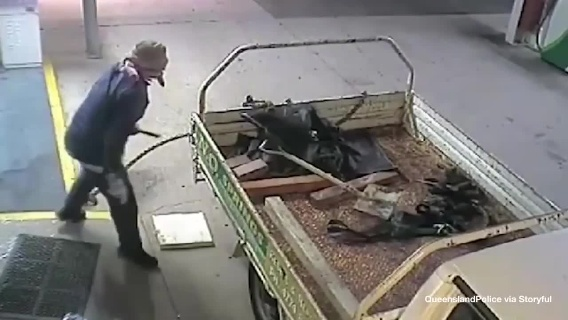
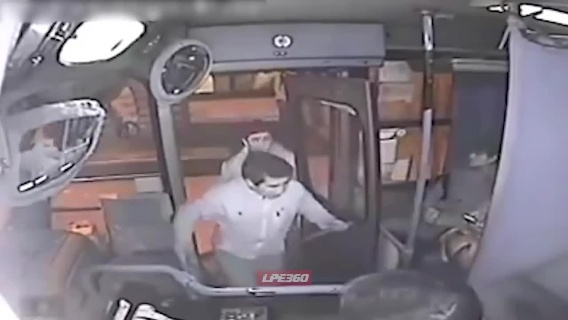
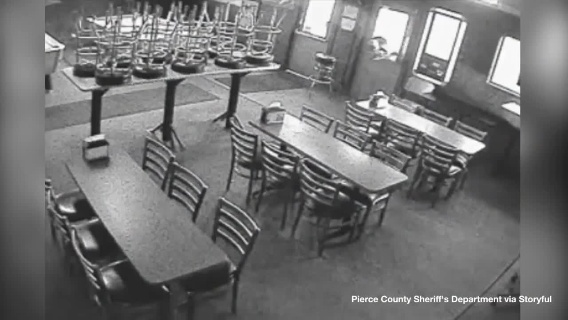
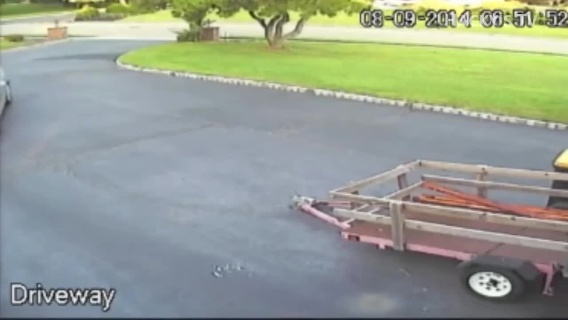
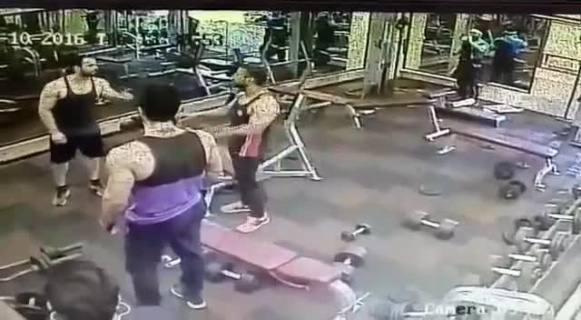
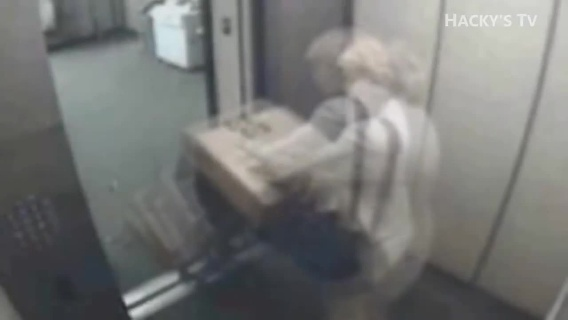

In [6]:
fd.vis.outliers_gallery(num_images=10, label_col='blip')

In [25]:
# In the above reports the captions are given under the "label" field name

## Look at image outliers, and classify them into indoors/outdoors

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27413.75it/s]

Stored outliers visual view in  out_frames/galleries/outliers.html



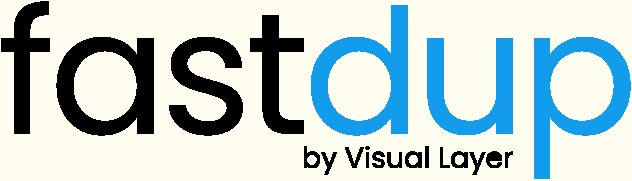
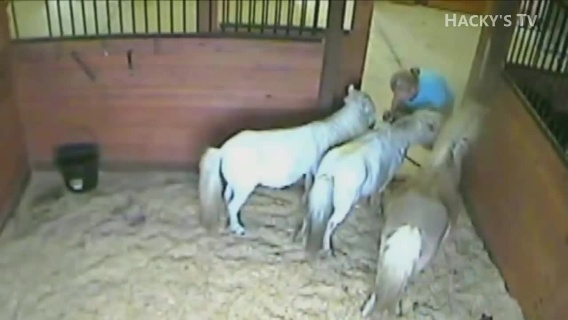
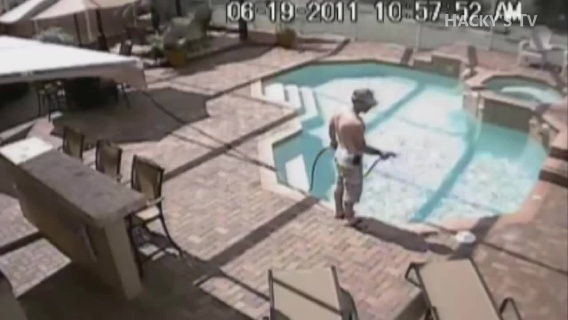
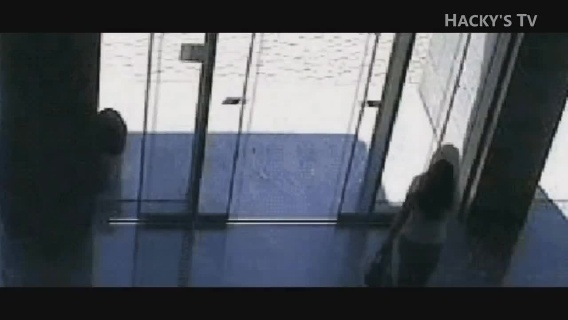
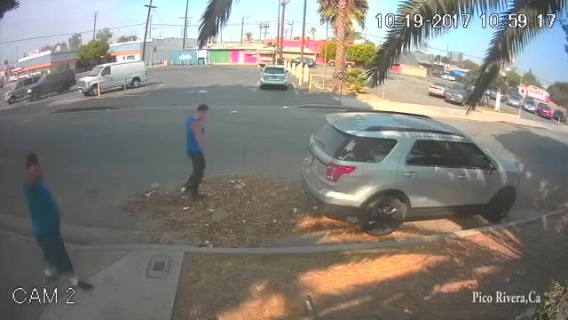
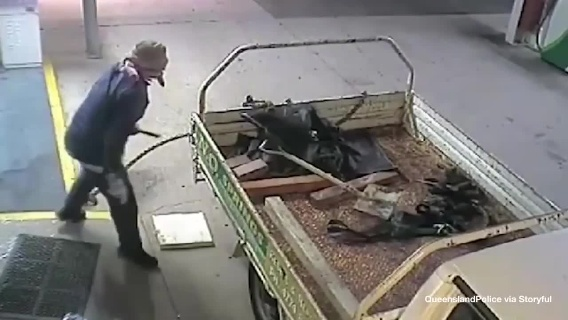
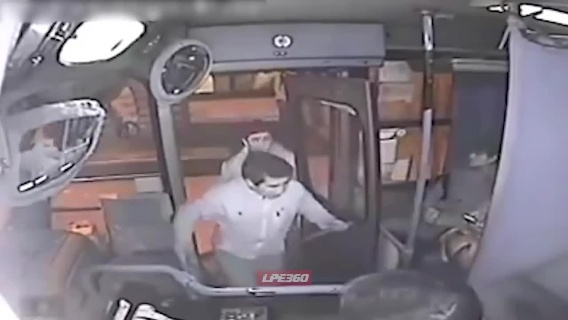
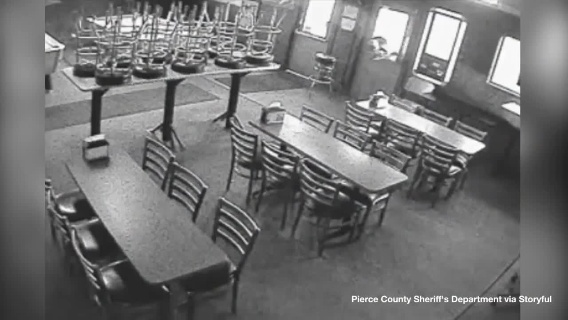
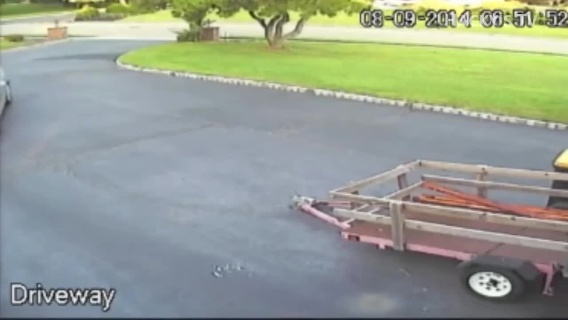
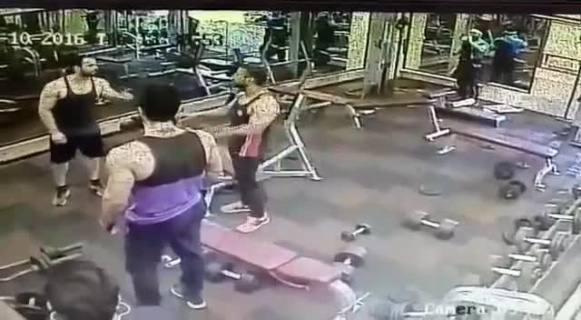
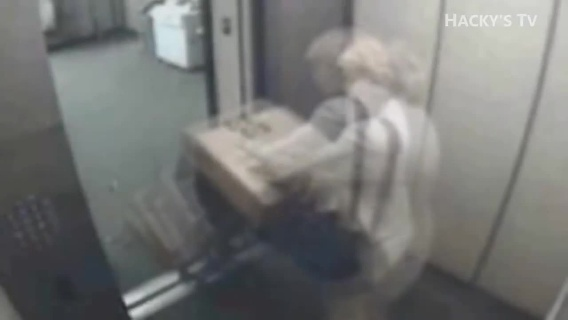

In [10]:
fd.vis.outliers_gallery(num_images=10, label_col='indoors_outdoors')

In [28]:
# As can be seen the indoors/outdoors classifier is 90% correct on the above example